In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('bmh')

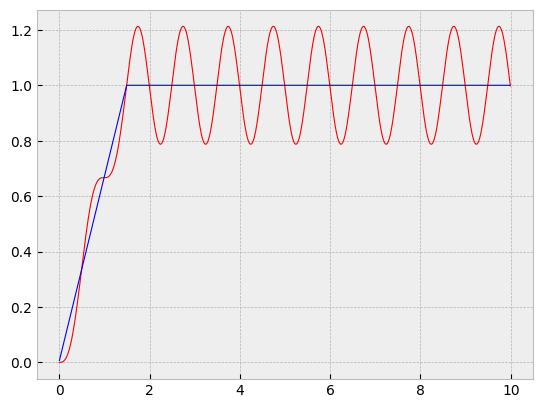

In [2]:
## Calcul de la reponse d'un systeme lineaire
## par la methode de la difference centrale
## (Chopra p.161)
## 
## interval de temps: dt
dt=1/100
## 
## nb de points: nb
nb=1000
t = np.arange(0,nb)*dt
## 
## temps de montee: Tr
Tr=1.5
## 
## vecteur de force: F
F=np.ones(nb)
for I in range(int(Tr/dt)):
    F[I]=(I+1)*dt/Tr
## 
## amortissement: z
z=0.0/100
## 
## frequence propre: f
f=1.0
## Stabilite
'Tn/dt (> np.pi)'
1/f/dt
if 1/f/dt <= np.pi:
	raise ValueError(f'{Tn/dt = } <= pi')
## pulsation propre: w
w=2*np.pi*f
## 
## conditions initiales
u = np.zeros(nb)
v = np.zeros(nb)
## 
## 
## ****************************************************************
## Calcul initiaux kksurM, asurM, bsurM, uzero
## ****************************************************************
## 
## calculs preliminaires
a = np.zeros(nb)
a[0]=F[0]-2*z*w*v[0]-w**2*u[0]
uzero=u[0]-dt*v[0]+dt**2/2*a[0]
kksurM=1/dt**2+z*w/dt
asurM=1/dt**2-z*w/dt
bsurM=w**2-2/dt**2
## 
## 
## ****************************************************************
## deplacements u, vitesses v, accelerations a
## ****************************************************************
## 
I=1
ppsurM=F[I]-asurM*uzero-bsurM*u[I]
u[I+1]=ppsurM/kksurM
v[I]=u[I+1]-uzero/2/dt
a[I]=(u[I+1]-2*u[I]+uzero)/dt**2
for I in range(1,nb-1):
	ppsurM=F[I]-asurM*u[I-1]-bsurM*u[I]
	u[I+1]=ppsurM/kksurM
	v[I]=(u[I+1]-u[I-1])/2/dt
	a[I]=(u[I+1]-2*u[I]+u[I-1])/dt**2

v[nb-1]=v[nb-2]
a[nb-1]=a[nb-2]
## 
## 
## dessin de la reponse
plt.plot(t,u*w**2,'r',t,F,'b', ms=2, mfc='w', linewidth=0.8)
plt.show()
